#### Notes:
1. Paper = publication
1. References (number of publications a publication refers to) and citations (number of publications referring to a publication)
1. Change the path in the next cell

In [1]:
# path = 'index50461.txt'
path = 'AP_train.txt'

In [2]:
import sys
import csv
import collections
import matplotlib.pyplot as plt
import statistics

In [3]:
def mean(data):
    data = list(map(int, data))
    n = len(data)
    return sum(data)/n

def stdev(data):
    data = list(map(int, data))
    n = len(data)
    c = mean(data)
    ss = sum((x-c)**2 for x in data) / (n-1)
    return ss**0.5

def quartile(data):
    q1 = q2 = q3 = 0
    l = len(data)
    if l % 2 == 1:
        median = int(l/2)
        q2 = data[median]
        if median % 2 == 1:
            i = int(median / 2)
            q1 = data[i]
            q3 = data[int((median + l) / 2)]
        else:
            i = int(median / 2)
            j = int(median / 2 - 1)
            q1 = (data[i] + data[j]) / 2.0
            q3 = (data[int((median + l) / 2)] + data[int((median + l) / 2 + 1)]) / 2.0
    else:
        median = int(l/2)
        median2 = median - 1
        q2 = (data[median] + data[median2]) / 2.0
        if median % 2 == 1:
            i = int(median / 2)
            q1 = data[i]
            q3 = data[int((median + l) / 2)]
        else:
            i = int(median / 2)
            j = int(median / 2 - 1)
            q1 = (data[i] + data[j]) / 2.0
            q3 = (data[int((median + l) / 2)] + data[int((median + l) / 2 - 1)]) / 2.0
    return q1, q2, q3

def impact(venue):
    # print('venue_publications: ', venue_publications)
    # print('publication_citations: ', publication_citations)
    totalCitationLst = []
    for publication in venue_publications[venue]:
        if publication in publication_citations:
            totalCitationLst += publication_citations[publication]
    # print('totalCitationLst: ', totalCitationLst)
    totalCitations = len(totalCitationLst)
    totalPublications = venue_numOfPublication[venue]
    return totalCitations/totalPublications

In [4]:
author_publications = {}
venue_publications = {}
venue_numOfPublication = {}
year_publications = {}
publication_references = {}
publication_citations = {}
references = set()
curIndex = -1
totalDistinctPublication = 0

In [5]:
with open(path, 'rt') as f:
    data = f.readlines()
    data = [d for d in data if d != '\n']
    for row in data:
        row = row.replace('\n', '')
        if row.startswith('#index '):
            curIndex = row[7:]
        elif row.startswith('#* '):
            totalDistinctPublication += 1
        elif row.startswith('#@ '):
            authors = row[3:].split(';')
            for au in authors:
                if au not in author_publications:
                    author_publications[au] = [curIndex]
                else:
                    author_publications[au].append(curIndex)
        elif row.startswith('#t '):
            year = row[3:]
            if year not in year_publications:
                year_publications[year] = [curIndex]
            else:
                year_publications[year].append(curIndex)
        elif row.startswith('#c '):
            venue = row[3:]
            if venue not in venue_numOfPublication:
                venue_numOfPublication[venue] = 1
            else:
                venue_numOfPublication[venue] += 1
            if venue not in venue_publications:
                venue_publications[venue] = [curIndex]
            else:
                venue_publications[venue].append(curIndex)
        elif row.startswith('#% '):
            ref = row[3:]
            references.add(ref)
            if curIndex not in publication_references:
                publication_references[curIndex] = [ref]
            else:
                publication_references[curIndex].append(ref)
            if ref not in publication_citations:
                publication_citations[ref] = [curIndex]
            else:
                publication_citations[ref].append(curIndex)
        elif row.startswith('#! '):
            pass
        else:
            pass
# print(author_publications)
# print(venue_numOfPublication)
# print(year_publications)
# print(publication_references)
# print(publication_citations)

In [6]:
# 3.1a Distinct authors, publication venues, publications, and citations/references
# totalDistinctAuthorsWithoutEmptyName = len([author for author in author_publications.keys() if author])
print('Total distinct authors: ', len(author_publications))
print('Total distinct venues: ', len(venue_numOfPublication))
print('Total distinct publications: ', str(totalDistinctPublication))
print('Total distinct citations/references: ', len(references))

# Total distinct authors:  1484999
# Total distinct venues:  255686
# Total distinct publications:  1976815
# Total distinct citations/references:  871089

Total distinct authors:  1484999
Total distinct venues:  255686
Total distinct publications:  1976815
Total distinct citations/references:  871089


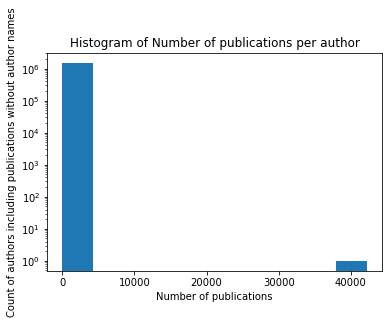

In [7]:
# 3.2a Histogram of the number of publications per author
publications_per_author_lst = [len(author_publications[author]) for author in author_publications]
plt.xlabel('Number of publications')
plt.ylabel('Count of authors including publications without author names')
plt.title('Histogram of Number of publications per author')
plt.hist(publications_per_author_lst)
plt.yscale('log')
plt.show()

There are about 40000 publications with no authors' names associated with them

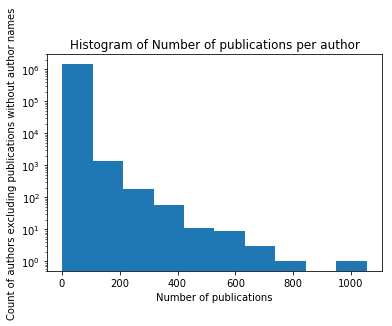

In [8]:
publications_per_author_lst = [len(author_publications[author]) for author in author_publications if author]
plt.xlabel('Number of publications')
plt.ylabel('Count of authors excluding publications without author names')
plt.title('Histogram of Number of publications per author')
plt.hist(publications_per_author_lst)
plt.yscale('log')
plt.show()

This is the plot that we only count the publications which have authors' name associated with them

In [9]:
# 3.2b Calculate the mean and standard deviation of the number of publications per author
# print(author_publications)
# print(publications_per_author_lst)
mean_publications_per_author = mean(publications_per_author_lst)
stdev_publications_per_author = stdev(publications_per_author_lst)
q1, q2, q3 = quartile(sorted(publications_per_author_lst))
q1_publications_per_author = q1
q2_publications_per_author = q2
q3_publications_per_author = q3
print('Mean of the number of publications per author: ', mean_publications_per_author)
print('Standard deviation of the number of publications per author', stdev_publications_per_author)
print('Q1 of the number of publications per author', q1_publications_per_author)
print('Q2 of the number of publications per author', q2_publications_per_author)
print('Q3 of the number of publications per author', q3_publications_per_author)

Mean of the number of publications per author:  3.2778986907726475
Standard deviation of the number of publications per author 8.821528361380773
Q1 of the number of publications per author 1
Q2 of the number of publications per author 1.0
Q3 of the number of publications per author 2


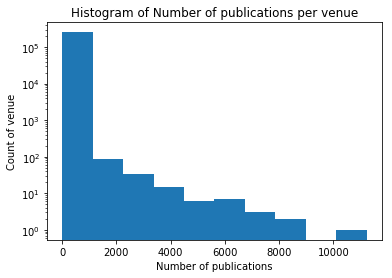

In [10]:
# 3.2c Histogram of the number of publications per venue
publications_per_venue_lst = [lstOfPublications for lstOfPublications in venue_numOfPublication.values()]
plt.xlabel('Number of publications')
plt.ylabel('Count of venue')
plt.title('Histogram of Number of publications per venue')
plt.hist(publications_per_venue_lst)
plt.yscale('log')
plt.show()

In [11]:
mean_publications_per_venue = mean(publications_per_venue_lst)
stdev_publications_per_venue = stdev(publications_per_venue_lst)
q1, q2, q3 = quartile(sorted(publications_per_venue_lst))
q1_publications_per_venue = q1
q2_publications_per_venue = q2
q3_publications_per_venue = q3
print('Mean of the number of publications per venue: ', mean_publications_per_venue)
print('Standard deviation of the number of publications per venue', stdev_publications_per_venue)
print('Q1 of the number of publications per venue', q1_publications_per_venue)
print('Q2 of the number of publications per venue', q2_publications_per_venue)
print('Q3 of the number of publications per venue', q3_publications_per_venue)

Mean of the number of publications per venue:  7.731416659496413
Standard deviation of the number of publications per venue 83.38121915760708
Q1 of the number of publications per venue 1
Q2 of the number of publications per venue 1.0
Q3 of the number of publications per venue 1


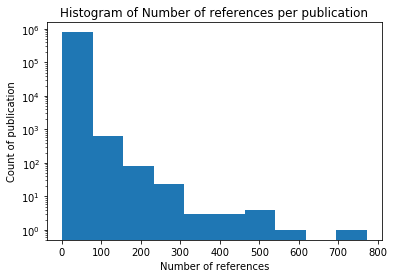

In [12]:
# 3.3a Histogram of the number of references per publication
# print(publication_references)
# print([len(lstOfReferences) for lstOfReferences in publication_references.values()])
plt.xlabel('Number of references')
plt.ylabel('Count of publication')
plt.title('Histogram of Number of references per publication')
plt.hist([len(lstOfReferences) for lstOfReferences in publication_references.values()])
plt.yscale('log')
plt.show()

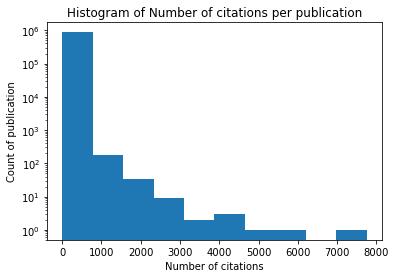

In [13]:
# Histogram of the number of citations per publication
plt.xlabel('Number of citations')
plt.ylabel('Count of publication')
plt.title('Histogram of Number of citations per publication')
plt.hist([len(lstOfCitations) for lstOfCitations in publication_citations.values()])
plt.yscale('log')
plt.show()

In [14]:
maxRef = max([len(lstOfReferences) for lstOfReferences in publication_references.values()])
print('Largest number of references: ', maxRef)
print('Publication with the largest number of references: ', max([index for index, lstOfReferences in publication_references.items() if len(lstOfReferences) == maxRef]))
maxCite = max([len(lstOfCitations) for lstOfCitations in publication_citations.values()])
print('Largest number of citations: ', maxCite)
print('Publication with the largest number of citations: ', max([index for index, lstOfCitations in publication_citations.items() if len(lstOfCitations) == maxCite]))

Largest number of references:  772
Publication with the largest number of references:  719353
Largest number of citations:  7753
Publication with the largest number of citations:  408396


255686
total num of venues:  255686


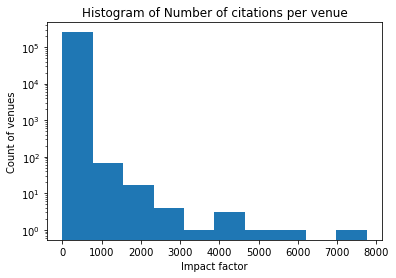

In [15]:
# 3.3b Calculate the “impact” factor for each venue
impact_factors = [impact(venue) for venue in venue_publications]
# print(impact_factors)
print(len(impact_factors))
print('total num of venues: ', len(venue_numOfPublication))
# Histogram of impact factor
plt.xlabel('Impact factor')
plt.ylabel('Count of venues')
plt.title('Histogram of Number of citations per venue')
plt.hist(impact_factors)
plt.yscale('log')
plt.show()

In [16]:
# 3.3c Highest impact factor, believable?
highestImpactFactor = max(impact_factors)
print('Highest impact factor: ', highestImpactFactor)

# Less than 1.7% of the venues have impact factor over 10, so this is hard to believe

Highest impact factor:  7753.0


23459


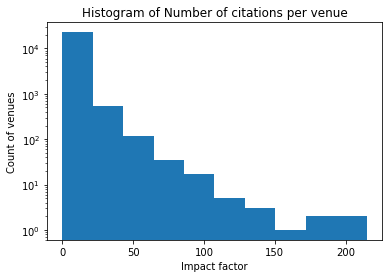

In [17]:
    # 3.3d Repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications
    impact_factors_for10 = [impact(venue) for venue in venue_publications if len(venue_publications[venue]) >= 10]
    # print(impact_factors_for10)
    print(len(impact_factors_for10))
    # Histogram of impact factor for publication over 10
    plt.xlabel('Impact factor')
    plt.ylabel('Count of venues')
    plt.title('Histogram of Number of citations per venue')
    plt.hist(impact_factors_for10)
    plt.yscale('log')
    plt.show()

In [18]:
# Highest impact factor for publications over 10, believable?
if impact_factors_for10:
    highestImpactFactor_for10 = max(impact_factors_for10)
    print('Highest impact factor: ', highestImpactFactor_for10)

Highest impact factor:  214.82608695652175


In [19]:
# The histogram for for number of venues that has high impact factors have drastically decreased. And
# obviously since we add a filter to filter impact factors with with only over 10 publications, the overall
# data has decreased. This is much more believable
citations_publications_for_highest_IF = []
for venue in venue_publications:
    if len(venue_publications[venue]) >= 10 and impact(venue) == highestImpactFactor_for10:
        citations_publications_for_highest_IF += venue_publications[venue]
print('citations_publications_for_highest_IF: ', citations_publications_for_highest_IF)
citations_counts_for_highest_IF = sorted([len(publication_citations[publication]) for publication in citations_publications_for_highest_IF if publication in publication_citations])
print('citations_counts_for_highest_IF: ', citations_counts_for_highest_IF)

citations_publications_for_highest_IF:  ['340164', '340165', '340166', '340167', '340168', '340169', '340170', '340171', '340172', '340173', '340174', '340175', '340176', '340177', '340178', '340179', '340180', '340181', '340182', '340183', '340184', '340185', '340187']
citations_counts_for_highest_IF:  [10, 11, 11, 19, 21, 22, 22, 27, 28, 42, 46, 46, 48, 50, 67, 87, 103, 112, 115, 138, 167, 1609, 2140]


In [20]:
if citations_counts_for_highest_IF:
    mean_IF = mean(citations_counts_for_highest_IF)
    print('mean_IF: ', mean_IF)
if citations_counts_for_highest_IF:
    median_IF = statistics.median(citations_counts_for_highest_IF)
    print('median_IF: ', median_IF)

# Both are useful. The mean is bigger than the median

mean_IF:  214.82608695652175
median_IF:  46


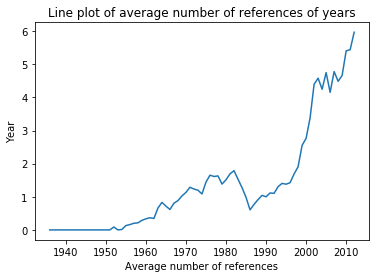

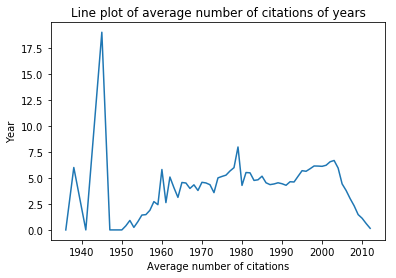

In [21]:
# 3.3e Construct a list of publications for each publication year
# print('publication_references: ', publication_references)
# print('publication_citations: ', publication_citations)
ave_ref_publications_per_year = []
ave_cite_publications_per_year = []
# print('year_publications: ', year_publications)
sortedYears = sorted(int(year) for year in year_publications if year)
for year in sortedYears:
    year = str(year)
    publications = year_publications[year]
    totalRefs = totalCites = 0
    numOfPublicationsInThisYear = len(publications)
    for publication in publications:
        if publication in publication_references:
            totalRefs += len(publication_references[publication])
        if publication in publication_citations:
            totalCites += len(publication_citations[publication])
    ave_ref_publications_per_year.append(totalRefs/numOfPublicationsInThisYear)
    ave_cite_publications_per_year.append(totalCites/numOfPublicationsInThisYear)

x = sortedYears
y = ave_ref_publications_per_year
z = ave_cite_publications_per_year

# plot
plt.xlabel('Average number of references')
plt.ylabel('Year')
plt.title('Line plot of average number of references of years')
plt.plot(x,y)
plt.show()

plt.xlabel('Average number of citations')
plt.ylabel('Year')
plt.title('Line plot of average number of citations of years')
plt.plot(x,z)
plt.show()